In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

In [2]:
movies = pd.read_csv('input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('input/tmdb-movie-metadata/tmdb_5000_credits.csv')

In [3]:
#movies.head()

In [4]:
#movies.describe()

In [5]:
#credits.head()

In [6]:
#credits.describe()

In [7]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [8]:
#movies.head()

In [9]:
#movies.iloc[25]

In [10]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [11]:
#movies.iloc[25]

In [12]:
movies.shape

(4803, 7)

In [13]:
movies.size

33621

In [14]:
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

In [15]:
movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [16]:
movies.dtypes

id                  int64
original_title     object
genres             object
cast               object
vote_average      float64
director           object
keywords           object
dtype: object

In [17]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

Text(0.5, 1.0, 'Top Genres')

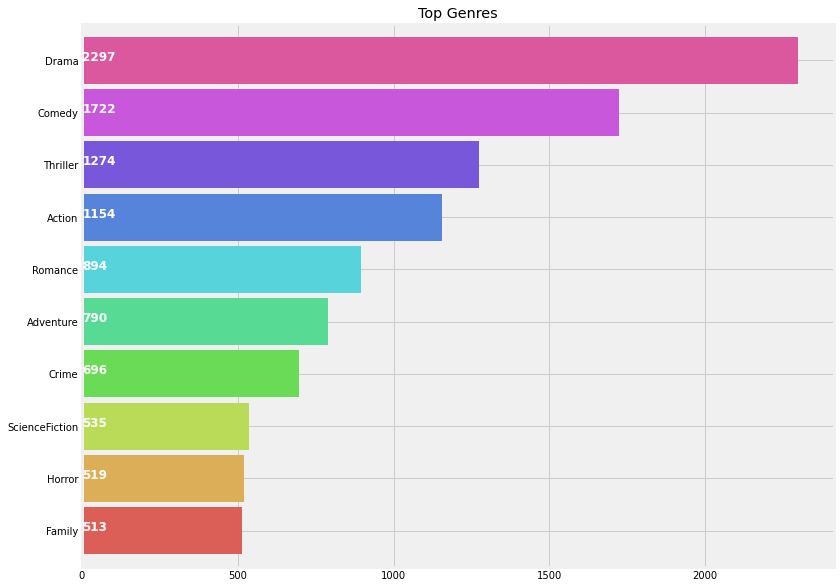

In [18]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
#plt.show()

Drama appears to be the most popular genre followed by Comedy.

In [19]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

Now lets generate a list 'genreList' with all possible unique genres mentioned in the dataset.



In [20]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [21]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [22]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [23]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

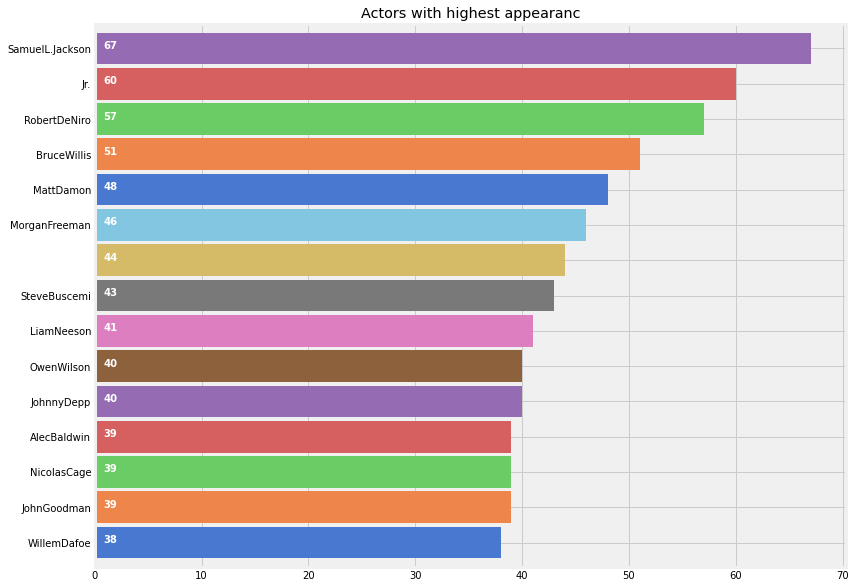

In [24]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
    plt.title('Actors with highest appearanc')
#plt.title('Actors with highest appearance')
#plt.show()

In [25]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [26]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [27]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [28]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

In [29]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

Text(0.5, 1.0, 'Directors with highest movies')

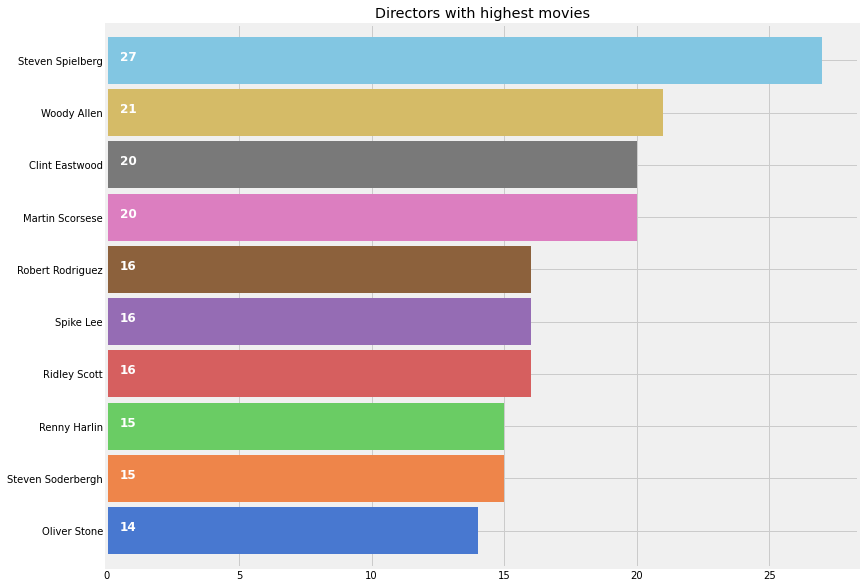

In [30]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
#plt.show()

In [31]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [32]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [33]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
#movies.head()

In [34]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# 👇️ <class 'wordcloud.wordcloud.WordCloud'>
print(WordCloud)


<class 'wordcloud.wordcloud.WordCloud'>


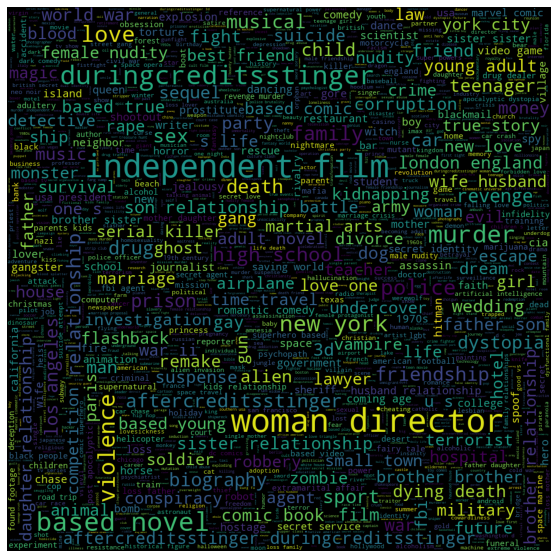

In [35]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
#plt.show()

In [36]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [37]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [38]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [39]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

In [40]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [41]:
Similarity(3,160) #checking similarity between any 2 random movies

2.068603127495341

We see that the distance is about 2.068, which is high. The more the distance, the less similar the movies are. Let's see what these random movies actually were.

In [42]:
#print(movies.iloc[3])
#print(movies.iloc[160])

It is evident that The Dark Knight Rises and How to train your Dragon 2 are very different movies. Thus the distance is huge.



In [43]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
#movies.head()

In [44]:
import operator

def predict(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
   # print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
   # print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [45]:
predict('Savages')

Selected Movie:  Savages

Recommended Movies: 

JFK | Genres: 'Drama','History','Thriller' | Rating: 7.5
Wall Street: Money Never Sleeps | Genres: 'Crime','Drama' | Rating: 5.8
Wall Street | Genres: 'Crime','Drama' | Rating: 7.0
Salvador | Genres: 'Drama' | Rating: 7.0
World Trade Center | Genres: 'Drama','History','Thriller' | Rating: 5.9
Talk Radio | Genres: 'Drama' | Rating: 6.7
Any Given Sunday | Genres: 'Drama' | Rating: 6.8
Nixon | Genres: 'Drama','History' | Rating: 7.1
W. | Genres: 'Drama','History' | Rating: 6.1
Born on the Fourth of July | Genres: 'Drama','War' | Rating: 6.7




In [46]:
predict('Donnie Darko')

Selected Movie:  Donnie Darko

Recommended Movies: 

Southland Tales | Genres: 'Action','Adventure','Comedy','Drama','ScienceFiction','Thriller' | Rating: 5.2
The Box | Genres: 'ScienceFiction','Thriller' | Rating: 5.4
Ghost | Genres: 'Drama','Fantasy','Mystery','Romance','Thriller' | Rating: 6.9
Meet Joe Black | Genres: 'Drama','Fantasy','Mystery' | Rating: 6.9
Lady in the Water | Genres: 'Drama','Fantasy','Mystery','Thriller' | Rating: 5.3
Straight Out of Brooklyn | Genres: 'Drama' | Rating: 4.3
I Love Your Work | Genres: 'Drama','Mystery' | Rating: 6.5
The Deep End of the Ocean | Genres: 'Drama','Mystery' | Rating: 5.9
The Lovely Bones | Genres: 'Drama','Fantasy' | Rating: 6.6
Eyes Wide Shut | Genres: 'Drama','Mystery' | Rating: 7.1




In [47]:
predict('Notting Hill')

Selected Movie:  Notting Hill

Recommended Movies: 

Morning Glory | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Forrest Gump | Genres: 'Comedy','Drama','Romance' | Rating: 8.2
Cyrus | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Emma | Genres: 'Comedy','Drama','Romance' | Rating: 7.6
Love Actually | Genres: 'Comedy','Drama','Romance' | Rating: 7.0
Lars and the Real Girl | Genres: 'Comedy','Drama','Romance' | Rating: 7.1
Larry Crowne | Genres: 'Comedy','Drama','Romance' | Rating: 5.7
In Good Company | Genres: 'Comedy','Drama','Romance' | Rating: 5.9
Molly | Genres: 'Comedy','Drama','Romance' | Rating: 5.5
When Harry Met Sally... | Genres: 'Comedy','Drama','Romance' | Rating: 7.3




In [48]:
predict('Hop')

Selected Movie:  Hop

Recommended Movies: 

Garfield: A Tail of Two Kitties | Genres: 'Animation','Comedy','Family' | Rating: 5.1
Alvin and the Chipmunks | Genres: 'Animation','Comedy','Family','Fantasy','Music' | Rating: 5.5
Max Keeble's Big Move | Genres: 'Comedy','Family','Fantasy','ScienceFiction' | Rating: 5.4
Muppets from Space | Genres: 'Comedy','Family','Fantasy','ScienceFiction' | Rating: 5.8
Toy Story 2 | Genres: 'Animation','Comedy','Family' | Rating: 7.3
Toy Story 3 | Genres: 'Animation','Comedy','Family' | Rating: 7.6
Hoodwinked Too! Hood VS. Evil | Genres: 'Animation','Comedy','Family' | Rating: 4.8
Toy Story | Genres: 'Animation','Comedy','Family' | Rating: 7.7
The SpongeBob SquarePants Movie | Genres: 'Animation','Comedy','Family' | Rating: 6.7
Hoodwinked! | Genres: 'Animation','Comedy','Family' | Rating: 5.9




In [49]:
predict('Toy Story 2')

Selected Movie:  Toy Story 2

Recommended Movies: 

Toy Story | Genres: 'Animation','Comedy','Family' | Rating: 7.7
Cars 2 | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 5.8
Cars | Genres: 'Adventure','Animation','Comedy','Family' | Rating: 6.6
Hop | Genres: 'Animation','Comedy','Family' | Rating: 5.5
Toy Story 3 | Genres: 'Animation','Comedy','Family' | Rating: 7.6
Hoodwinked! | Genres: 'Animation','Comedy','Family' | Rating: 5.9
Barnyard | Genres: 'Animation','Comedy','Family' | Rating: 5.3
Hoodwinked Too! Hood VS. Evil | Genres: 'Animation','Comedy','Family' | Rating: 4.8
The SpongeBob SquarePants Movie | Genres: 'Animation','Comedy','Family' | Rating: 6.7
Free Birds | Genres: 'Animation','Comedy','Family' | Rating: 5.7




In [50]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\Jayesh-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
predict ('Emma')

Selected Movie:  Alex & Emma

Recommended Movies: 

And So It Goes | Genres: 'Comedy','Drama','Romance' | Rating: 5.7
The American President | Genres: 'Comedy','Drama','Romance' | Rating: 6.5
When Harry Met Sally... | Genres: 'Comedy','Drama','Romance' | Rating: 7.3
The Story of Us | Genres: 'Comedy','Drama','Romance' | Rating: 5.9
The Princess Bride | Genres: 'Adventure','Comedy','Family','Fantasy','Romance' | Rating: 7.6
The Bucket List | Genres: 'Comedy','Drama' | Rating: 7.0
Flipped | Genres: 'Drama','Romance' | Rating: 7.4
Woo | Genres: 'Comedy','Romance' | Rating: 5.5
Made of Honor | Genres: 'Comedy','Romance' | Rating: 6.0
Mambo Italiano | Genres: 'Comedy','Romance' | Rating: 5.6




In [57]:
predict('Batman')

Selected Movie:  Batman v Superman: Dawn of Justice

Recommended Movies: 

Man of Steel | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 6.5
300 | Genres: 'Action','Adventure','War' | Rating: 7.0
Legend of the Guardians: The Owls of Ga'Hoole | Genres: 'Adventure','Animation','Family','Fantasy' | Rating: 6.5
Sucker Punch | Genres: 'Action','Fantasy','Thriller' | Rating: 5.9
Dawn of the Dead | Genres: 'Action','Fantasy','Horror' | Rating: 6.8
Watchmen | Genres: 'Action','Mystery','ScienceFiction' | Rating: 7.0
Thor: The Dark World | Genres: 'Action','Adventure','Fantasy' | Rating: 6.8
Thor | Genres: 'Action','Adventure','Fantasy' | Rating: 6.6
The Scorpion King | Genres: 'Action','Adventure','Fantasy' | Rating: 5.3
Dungeons & Dragons: Wrath of the Dragon God | Genres: 'Action','Adventure','Fantasy' | Rating: 4.8




In [58]:
predict('300')

Selected Movie:  300: Rise of an Empire

Recommended Movies: 

American Sniper | Genres: 'Action','War' | Rating: 7.4
300 | Genres: 'Action','Adventure','War' | Rating: 7.0
Act of Valor | Genres: 'Action','Thriller','War' | Rating: 6.3
Top Gun | Genres: 'Action','Romance','War' | Rating: 6.7
We Were Soldiers | Genres: 'Action','History','War' | Rating: 6.7
Lion of the Desert | Genres: 'Action','History','War' | Rating: 7.4
Fury | Genres: 'Action','Drama','War' | Rating: 7.4
Tears of the Sun | Genres: 'Action','Drama','War' | Rating: 6.4
Soldier | Genres: 'Action','ScienceFiction','War' | Rating: 6.1
Once Upon a Time in Mexico | Genres: 'Action' | Rating: 6.2


